# BioImagePy: runner or process execution

This tutorial descibe the use of the **Runner** class to run a process. A process runable with the **Runner** class is a command line tool descibed by a *XML* file. The structure and content of a process *XML* file is not detailled in this tutorial. Please refer to the **BioImageIT** project documentation or to the **Galaxy Project** wrapper documentation to know more about *XML* process file or wrappers.

In this tutorial, we assume that we have the process `sdeconv2d` available. What we call a process here is a executable program and it associated *XML* wrapper.


## Setup the process

In [1]:
import sys

# this is an optional command to link BioImagePy from local directory
sys.path.append("../bioimagepy") # Change this path to the bioimagepy directory

# initialize the configuration
from bioimagepy.config import ConfigAccess
ConfigAccess("../config.json")

To run a process you need first to instantiate a **Process**. A **Process** is a class than contains all the matadata of the process. 
As it is tedious to instantiate a **Process** with the path of the XML file, **BioImagePy** provides a **ProcessAccess** class that manage an *XML wrappers* database. A process can than be instantiate by it fullname (ie name plus version)

In [2]:
from bioimagepy.process import ProcessAccess, Process

# show the list of all available processes
processAccess = ProcessAccess()
processAccess.search()

sampletool_v0.1.0	     SampleTool	          0.1.0	     sequential	/Users/sprigent/Documents/code/bioimage-it/package/bioimageit/toolboxes/tools/sampletool/tools/sampletool.xml
threshold_particles_v1.0.0	Count particles	          1.0.0	     sequential	/Users/sprigent/Documents/code/bioimage-it/package/bioimageit/toolboxes/tools/fiji/tools/threshold_particles.xml
Wilcoxon_v1.0.0	       Wilcoxon	          1.0.0	          merge	/Users/sprigent/Documents/code/bioimage-it/package/bioimageit/toolboxes/tools/htesting/tools/wilcoxon.xml
sdeconv3d_v0.1.0	    SPARTION 3D	          0.1.0	     sequential	/Users/sprigent/Documents/code/bioimage-it/package/bioimageit/toolboxes/tools/simg/tools/sdeconv3d.xml
sdeconv2d_v0.1.0	    SPARTION 2D	          0.1.0	     sequential	/Users/sprigent/Documents/code/bioimage-it/package/bioimageit/toolboxes/tools/simg/tools/sdeconv2d.xml


In [3]:
# get the svdeconv2d process
process = ProcessAccess().get('sdeconv2d_v0.1.0')
if process:
    process.man()
else:
    print("Process not found")    

SPARTION 2D : 
	              i	               	    Input Image
	          sigma	              3	          Sigma
	 regularization	              7	 Regularization
	      weighting	            0.6	      Weighting
	         method	            HSV	         Method
	  normalization	             L2	  Normalization
	              o	               	 Denoised image


## Setup the runner

Now we can instantiate the runner with the process

In [4]:
from bioimagepy.runner import Runner

runner = Runner(process)
runner.man()

SPARTION 2D : 
	              i	               	    Input Image
	          sigma	              3	          Sigma
	 regularization	              7	 Regularization
	      weighting	            0.6	      Weighting
	         method	            HSV	         Method
	  normalization	             L2	  Normalization
	              o	               	 Denoised image


The `man()` method prints a man page that describe the process. Thus we need to execute the `svdeconv` process with four parameters.

## Execute on files with exec()

To execute the process we simply run the method exec with the parameters descibed in the `man()` method of the process:

In [5]:
import imageio

runner.exec('i', 'synthetic_data/data/population1_001.tif', 
            'o', 'population1_001_deconv.tif', 
            'sigma', 2,
            'regularization', 2, 
            'weighting', 0.1,
            'normalization', 'max',
            'method', 'SV') 

myoutput = imageio.imread('population1_001_deconv.tif')

run singularity container: docker://registry.gitlab.inria.fr/serpico/simg:afbc555878224840eea7470d1f1238f0d9fd2022
args: ['sdeconv2d', '-i', 'synthetic_data/data/population1_001.tif', '-o', 'population1_001_deconv.tif', '-sigma', '2', '-regularization', '2', '-weighting', '0.1', '-method', 'SV', '-normalization', 'max', '-niter', '200']

[
3
4
m
I
N
F
O
:
 
 
 

[
0
m
 
C
o
n
v
e
r
t
i
n
g
 
O
C
I
 
b
l
o
b
s
 
t
o
 
S
I
F
 
f
o
r
m
a
t



[
3
4
m
I
N
F
O
:
 
 
 

[
0
m
 
S
t
a
r
t
i
n
g
 
b
u
i
l
d
.
.
.


G
e
t
t
i
n
g
 
i
m
a
g
e
 
s
o
u
r
c
e
 
s
i
g
n
a
t
u
r
e
s


S
k
i
p
p
i
n
g
 
f
e
t
c
h
 
o
f
 
r
e
p
e
a
t
 
b
l
o
b
 
s
h
a
2
5
6
:
d
5
1
a
f
7
5
3
c
3
d
3
a
9
8
4
3
5
1
4
4
8
e
c
0
f
8
5
d
d
a
f
c
5
8
0
6
8
0
f
d
6
d
f
c
e
9
f
4
b
0
9
f
d
b
3
6
7
e
e
1
e
3
e


S
k
i
p
p
i
n
g
 
f
e
t
c
h
 
o
f
 
r
e
p
e
a
t
 
b
l
o
b
 
s
h
a
2
5
6
:
f
c
8
7
8
c
d
0
a
9
1
c
7
b
e
c
e
5
6
f
6
6
8
b
2
c
7
9
a
1
9
d
9
4
d
d
5
4
7
1
d
a
e
4
1
f
e
5
a
7
e
1
4
b
4
a
e
6
5
2
5
1
f
6


S
k
i
p
p
i

Lets visualize the output:

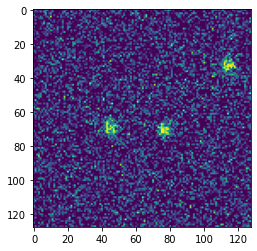

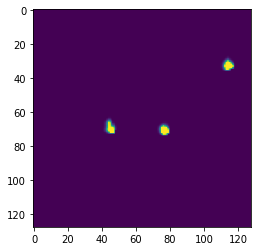

In [7]:
import matplotlib.pyplot as plt

plt.figure(1)                      
plt.imshow(imageio.imread('synthetic_data/data/population1_001.tif'))
plt.figure(2)
plt.imshow(myoutput)
plt.show()

This `exec()` method works on data files. This has the advantage that data are not loaded into python variables but sent directly to the external process. 

## Wrapping up

In this short tutorial, we saw the usage of the **Runner** and **Process** classes. Basically we need to know 2 methods
1. `man`: to get the list of the process I/O and parameters
2. `exec`: to execute the process on files

This **Runner** class is a single data level processing and does not generate any metadata. To run a process on an experiment dataset and have automatically generated metadata, we use the **Pipeline** class in the next tutorial